In [4]:
#CNN sample program

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess data
# Reshape to (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9527 - loss: 0.1618 - val_accuracy: 0.9825 - val_loss: 0.0578
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9848 - loss: 0.0499 - val_accuracy: 0.9840 - val_loss: 0.0527
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9885 - loss: 0.0346 - val_accuracy: 0.9883 - val_loss: 0.0409
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9919 - loss: 0.0244 - val_accuracy: 0.9902 - val_loss: 0.0405
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9935 - loss: 0.0197 - val_accuracy: 0.9897 - val_loss: 0.0375
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9957 - loss: 0.0136 - val_accuracy: 0.9885 - val_loss: 0.0445
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9961 - loss: 0.0119 - val_accuracy: 0.9883 - val_loss: 0.0469
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9969 - loss: 0.0095 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted digit: 1


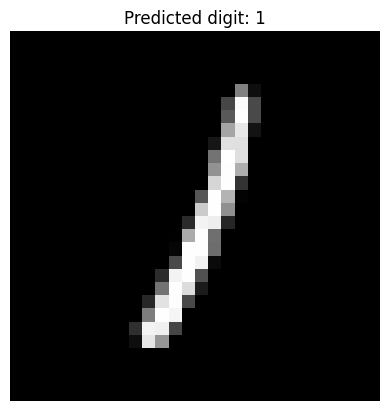

In [11]:
# Predict on a sample image
import numpy as np

sample_image = x_test[907].reshape(1,28,28,1)
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)
print("Predicted digit:", predicted_class)

# Display the sample image
plt.imshow(x_test[907].reshape(28,28), cmap='gray')
plt.title(f"Predicted digit: {predicted_class}")
plt.axis('off')
plt.show()